# Homework 4 Solutions

In [1]:
# Import modules
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
from scipy.linalg import solve

# Use LaTex
plt.rcParams['text.usetex'] = True

# Use Seaborn style
plt.style.use('seaborn')

## Problem 1
Consider the cash flows in the following table.   

| Time | 0 | 1 | 2 | 3 |
| --- | --- | --- | --- | --- |
| Cash Flow | -100 | 60 | 20 | 50 |


(a) Write a Python function that gives the NPV of the cash flows for a given discount rate.

**Solution**

In [2]:
# NPV function
def NPV(r):
    
    # Convert r to decimal 
    r *= 0.01
    
    # Define the time of the cash flows
    time = np.array([0, 1, 2, 3])
    
    # Define the cash flows
    cash_flow = np.array([-100, 60, 20, 50])
    
    # Calculate the discount factors
    discount = (1 + r)**(-time)
    
    # Calculate the NPV
    return np.sum(cash_flow * discount)
    
# Try out function
fun = NPV(5)

# Check
check = -100 + 60/(1 + 0.05) + 20/(1 + 0.05)**2 + 50/(1 + 0.05)**3

if np.isclose(fun, check):   
    print('Everything is working great!')   
else:  
    print("Looks like there's a problem")
    

Everything is working great!


(b) Use part (a) to create a function that numerically computes the derivative of the NPV with respect to the discount rate.

**Solution**

In [3]:
# Define a small step
h = 1e-4

# Create derivative 
NPV_prime = lambda r: (NPV(r + h) - NPV(r - h))/(2 * h)

(c) Newton's method is an algorithm to find the roots of a differentiable function $f$. The first step is to make an initial guess $x_0$. Then
$$
x_n = x_{n-1} - \frac{f(x_{n-1})}{f'(x_{n-1})}
$$
for $n = 1, 2, \ldots $. Apply Newton's method to find the smallest positive root of the function you created in (a).  Make sure your solution is accurate to at least two basis points. The solution is called the *internal rate of return* or *IRR*.

**Solution**

In [4]:
# Define the old and new discount rates
r_old, r_new = -1, 0

# We will make it accurate to 0.01 basis points to be safe
while np.abs(r_new - r_old) > 1e-4:
    
    r_old = r_new
    
    r_new = r_old - NPV(r_old)/NPV_prime(r_old)

# Print result
print(f'The internal rate of return is {r_new:.3f}%')

The internal rate of return is 15.110%


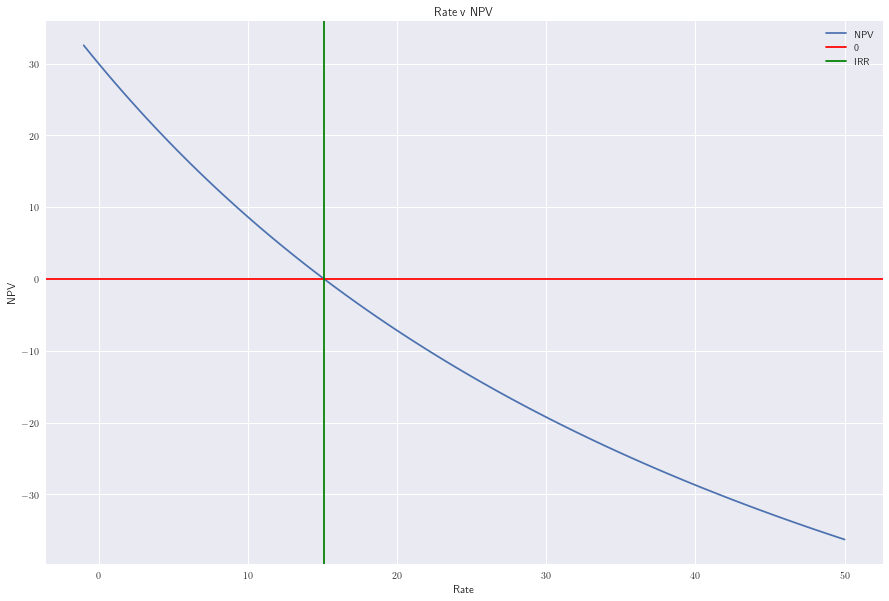

In [5]:
# Let's check to make sure this is result is the smallest positive return with a graph

# Define r-values
r_vals = np.linspace(-1, 50, 100)

# Calculate NPV-values
npv_vals = [NPV(r) for r in r_vals]

# Change figure size
plt.figure(figsize = (15, 10))

# Plot the NPV as a function of the rate
plt.plot(r_vals, npv_vals, label = 'NPV')

# Draw a horizontal line at 0 so it's clear where the NPV intersects 0 
plt.axhline(y = 0, color = 'r', label = '0')

# Draw a vertical line for our IRR
plt.axvline(x = r_new, color = 'g', label = 'IRR') 

# Give the plot a title
plt.title('Rate v NPV')

# Label the x-axis
plt.xlabel('Rate')

# Label the y-axis
plt.ylabel('NPV')

# Show legend
plt.legend()

plt.show()

(d) Use $\texttt{root_scalar}$ in $\texttt{scipy.optimize}$ to check (c).

**Solution**

In [6]:
# As can be seen from our graph, we don't need to be careful about our x1-value
root_scalar(NPV, x0 = 0, x1 = 100)

      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 9
           root: 15.109803663891194

## Problem 2
Use partition pairs of the form $P = (1, b^{1/n}, b^{2/n}, \ldots, b)$ and $T = (1, b^{1/n}, b^{2/n},\ldots, b^{(n - 1)/n})$ to analytically compute
$$
\int_1^b \frac{dx}{x^p}
$$
for $b,\ p > 1$.

**Solution**
Since $1/x^p$ is continuous on $[1, b]$, we know it's integrable. As a result, any partition pair should converge to the integral as the mesh goes to 0. It follows that

$
\begin{align*}
\int_1^b \frac{dx}{x^p} &= \lim_{n\to\infty}\sum_{k = 1}^n \frac{1}{(b^{(k - 1)/n})^p}\left(b^{k/n} - b^{(k - 1)/n}\right)\\
                        &= \lim_{n\to\infty}\sum_{k = 1}^n b^{-p(k - 1)/n}\left(b^{k/n} - b^{(k - 1)/n}\right)\\
                        &= \lim_{n\to\infty}\sum_{k = 1}^n b^{1/n} b^{(1 -p)(k - 1)/n} - b^{(1 - p)(k - 1)/n}\\
                        &= \lim_{n\to\infty}\sum_{k = 1}^n (b^{1/n} - 1) b^{(1 -p)(k - 1)/n}\\
                        &= \lim_{n\to\infty}(b^{1/n} - 1) \sum_{k = 1}^n  b^{(1 -p)(k - 1)/n}
\end{align*}
$

Using the finite geometric series formula with common ratio $b^{(1-p)/n}$, we see
$$
\sum_{k = 1}^n  b^{(1 -p)(k - 1)/n} = \frac{1 - b^{1-p}}{1 - b^{(1 - p)/n}}.
$$
Hence,
$$
\int_1^b \frac{dx}{x^p} = \lim_{n\to\infty}(b^{1/n} - 1) \frac{1 - b^{1-p}}{1 - b^{(1 - p)/n}}
                        = (1 - b^{1-p}) \lim_{n\to\infty}\frac{b^{1/n} - 1}{1 - b^{(1 - p)/n}}.
$$

The limit is in the 0/0 indeterminate form. So, we can--and will--use L'Hôspital's rule:

$$
\lim_{n\to\infty}\frac{b^{1/n} - 1}{1 - b^{(1 - p)/n}}  = \lim_{x\to 0^+}\frac{b^{x} - 1}{1 - b^{(1 - p)x}}
                                                       \stackrel{LH}{=} \lim_{x\to\infty}\frac{b^{x}\cdot \ln(b)}{- b^{(1 - p)x}\cdot (1 -p)\ln(b)}
                                                       = \lim_{x\to 0^+} -\frac{b^{px}}{1 - p}
                                                       = \frac{1}{p - 1}.
$$

Thus,
$$
\int_1^b \frac{dx}{x^p} = \frac{1 - b^{1-p}}{p - 1}.
$$
This result is consistant with the antiderivative power rule formula.


## Problem 3

| $x_i$ | 1 | 2 | 3 | 4 | 5 |
| --- | --- | --- | --- | --- | --- |
| $y_i$ |0.87 | 3.37 | 2.37 | 6.79 | 9.05 |

Define an inner product on the vector space of functions from $\{1, 2, 3, 4, 5\}$ to $\mathbb{R}$ as
$$
\langle f, g \rangle = \sum_{i = 1}^5 f(x_i) g(x_i).
$$


In [7]:
# Define x-values
x_vals = np.arange(1, 6)

# Define inner product based on question
inner_product = lambda f, g: np.sum([f(x) * g(x) for x in x_vals])

# Use inner product to create norm
norm = lambda f: np.sqrt(inner_product(f, f))

# Create function to get polynomial coefficients
def get_plolynomial_coeffs(plolynomial, degree):
        
    # Generate test x-values
    test_vals = np.arange(1, degree + 2).reshape((-1, 1))

    # Raise test_vals to powers up to degree
    A = np.concatenate([test_vals**i for i in range(degree + 1)], axis = 1)

    # Evaluate at test_vals; assume plolynomial vectorized
    y = plolynomial(test_vals)

    # Solve system
    coeffs = solve(A, y).flatten()

    return coeffs

(a) Orthogonalize the first two elements of the basis $(1, x, x^2,x^3, x^4)$ using the inner product defined above.

**Solution**

In [8]:
# Define y-values
y_vals = np.array([0.87, 3.37, 2.37, 6.79, 9.05])

# Use Gram-Schmidt orthogonalization 
u1 = lambda x: 1

print(f'The basis vector u1(x) = {u1(0):.2f}.')

# This is slow; if speed is an issue better to have an analytic solution
u2 = lambda x: x - inner_product(lambda x: x, u1)/inner_product(u1, u1) * u1(x)

# Get coefficients
coefs = get_plolynomial_coeffs(u2, 1)

print(f'The basis vector u2(x) = {coefs[0]:.3f} + {coefs[1]:.3f}x.')

The basis vector u1(x) = 1.00.
The basis vector u2(x) = -3.000 + 1.000x.


(b) Project the function $f$ with the $xy$-coordinates in the table onto the two orthogonal basis elements you found in (a), and then rewrite your solution in the form $a + bx$. Due to the Projection Theorem, the function $g(x) = \alpha + \beta x$ that minimizes
$$
\|f - g\|^2 = \sum_{i = 1}^5 \left[f(x_i) - g(x_i)\right]^2 =  \sum_{i = 1}^5 \left[y_i- g(x_i)\right]^2
$$
is your result. Note: This only holds on the domain $\{1, 2, 3, 4, 5\}$.

**Solution**

In [9]:
# Define f
f = lambda x: y_vals[x - 1] if x in x_vals else np.nan

# Get the projections
alpha1 = inner_product(f, u1)/inner_product(u1, u1) 
alpha2 = inner_product(f, u2)/inner_product(u2, u2)

# Define f_hat
f_hat = lambda x: alpha1 * u1(x) + alpha2 * u2(x)

# Get coefficients
coefs = get_plolynomial_coeffs(f_hat, 1)

print(f'Our linear approximation is {coefs[0]:.3f} + {coefs[1]:.3f}x.')

Our linear approximation is -1.444 + 1.978x.


(c)  Define
$$
\mathcal{L}_2(\alpha, \beta) = \sum_{i = 1}^5 \left(y_i- \alpha - \beta x_i\right)^2.
$$
Minimize $\mathcal{L}_2$ with respect to $\alpha$ and $\beta$ to analytically verify (b). Remember to check whether your solution is a minimum or a maximum. 

**Solution**

We need to take the parials of $\mathcal{L}_2$ with respect to $\alpha$ and $\beta$:
$$
\frac{\partial \mathcal{L}_2}{\partial \alpha} = -2 \sum_{i = 1}^5 (y_i - \alpha - \beta x_i) = -44.9 + 10 \alpha + 30\beta,
$$
and
$$
\frac{\partial \mathcal{L}_2}{\partial \beta} = -2 \sum_{i = 1}^5 x_i (y_i - \alpha - \beta x_i) = -174.26 + 30\alpha + 110\beta.
$$
Note: we used Python to calculate
$$
\sum_{i = 1}^5 y_i = 22.45\qquad\text{and}\qquad \sum_{i = 1}^5 x_i y_i = 87.13.
$$
as well as
$$
\sum_{i = 1}^5 x_i = 15\qquad\text{and}\qquad \sum_{i = 1}^5 x_i^2 = 55
$$
though the latter two could have been calculated easily with formulas. Hence, the critical numbers are the solutions of
$$
\begin{align}
10 \alpha + 30\beta &= 44.9\\
30\alpha + 110\beta &= 174.26.
\end{align}
$$
Solving this system yields
$$
\alpha = -1.444\qquad\text{and}\qquad \beta = 1.978.
$$
This is the same as before!

To verify that this is a minimum, we first find the local minima. To find the local minima, we will use the second derivatives test. We need to find
$$
D = \left|\begin{array}{c c} \frac{\partial^2 \mathcal{L}_2}{\partial \alpha^2} & \frac{\partial^2 \mathcal{L}_2}{\partial \alpha\beta}\\
\frac{\partial^2 \mathcal{L}_2}{\partial \beta\alpha} & \frac{\partial^2 \mathcal{L}_2}{\partial \beta^2}\end{array}\right|.
$$
In this case,
$$
\frac{\partial^2 \mathcal{L}_2}{\partial \alpha^2} = 10,\qquad \frac{\partial^2 \mathcal{L}_2}{\partial \alpha\beta}=
 \frac{\partial^2 \mathcal{L}_2}{\partial \beta \alpha} = 30,\qquad \frac{\partial^2 \mathcal{L}_2}{\partial \beta^2} = 110. $$
Hence,
$$
D = \left|\begin{array}{c c} 10 & 30\\ 30 & 110\end{array}\right| = 1100 - 900 = 200.
$$
Because
$$
\frac{\partial^2 \mathcal{L}_2}{\partial \alpha^2} = 10 > 0\qquad\text{and}\qquad D = 200 > 0,
$$
we conclude that our solution is a local minimum. Because this is the only critical number and $\mathcal{L}_2$ increases as $\alpha^2 + \beta^2\to \infty$, this must be an absolute minimum.

(d) Use $\texttt{scatter}$ to graph the points in the table. Also, use $\texttt{plot}$ to graph the line corresponding to the coefficients you found in (b) on the same figure. Make sure to add a legend so that it is easy to interpret your results.

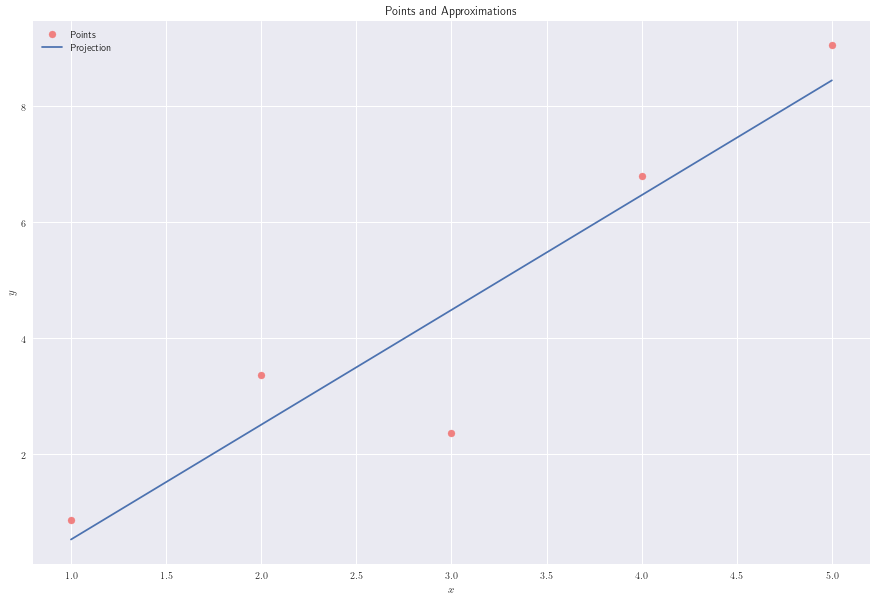

In [10]:
# Change figure size
plt.figure(figsize = (15, 10))

# Plot original points
plt.scatter(x_vals, y_vals, label = 'Points', color = 'lightcoral')

# Plot the values for the L_2 approximation
plt.plot(x_vals, f_hat(x_vals), label = 'Projection')

# Add a legend
plt.legend()

# Add x labels to axis
plt.xlabel(r'$x$')

# Add y labels to axis
plt.ylabel(r'$y$')

# Give the graph a title
plt.title(r'Points and Approximations')

plt.show()

# Problem 4
The central limit theorem tells us that if we independently sample $X_1, X_2,\ldots, X_n$  from an arbitrary distribution $\mathcal{D}$ with finite mean $\mu$ and variance $\sigma^2$, then $\frac{\sqrt{n}}{\sigma}(\bar{X} - \mu)\stackrel{d}{\longrightarrow} \mathcal{N}(0, 1^2)$ as $n\to\infty$. For problem 4, we will assume $X_k\sim{\mathcal{P}(1)}$, so $\mu = 1$ and $\sigma^2 = 1$.

(a) Use $\texttt{poisson.rvs}$ from $\texttt{scipy.stats}$ to generate four arrays of size $(n,100000)$ where $n=$10, 50, 100, and 1000. Set $\texttt{mu = 1}$ in every case; this is the parameter $\lambda$ from class. For each array, take the mean of each column via $\texttt{array.mean(axis = 0)}$. Standardize the array corresponding to $n$ using the rule $x\mapsto \sqrt{n} (x - 1)$.

**Solution**

In [11]:
# Set the random seed
np.random.seed(0)

# Define mu
mu = 1

# Define n-values
n_vals = [10, 50, 100, 1_000]

# Let us save the results in a dictionary
sample_dict = {n:stats.poisson.rvs(mu = mu, size = (n, 100_000)).mean(axis = 0) for n in n_vals}

# Standardize the results
for n in n_vals:
    
    sample_dict[n] = np.sqrt(n) * (sample_dict[n] - mu)
    

(b) For each $n$, estimate the probability that the corresponding standardized sample means from (a) are greater than 1.5. Also, find $P(Z > 1.5)$, where $Z\sim{\mathcal{N}(0, 1^2)}$.

**Solution**

In [12]:
print('Probability estimates for standardized samples of size n:\n')

# Loop over values of n
for n in n_vals:
    
    # Estimate and print probability
    print(f'n = {n}: prob {100 * np.mean(sample_dict[n] > 1.5):.2f}%')


Probability estimates for standardized samples of size n:

n = 10: prob 8.46%
n = 50: prob 7.21%
n = 100: prob 6.24%
n = 1000: prob 6.79%


In [13]:
# Calculate probability for a standard normal distribution
p = stats.norm.sf(1.5)

print(f'For a standard normal distribution the probability is {100 * p:.2f}%.')

For a standard normal distribution the probability is 6.68%.


(c) Display histograms of your results in (a). Create a $2\times 2$ grid of subplots using $\texttt{plt.subplots}$. Let each subplot correspond to one of your standardized sample means from (a). Use 50 bins for each histogram and set the density parameter to $\texttt{True}$. On each subplot also overlay the graph of $\phi$ the probability density function of $\mathcal{N}(0, 1^2)$. Add a title and legend to each subplot.

**Solution**

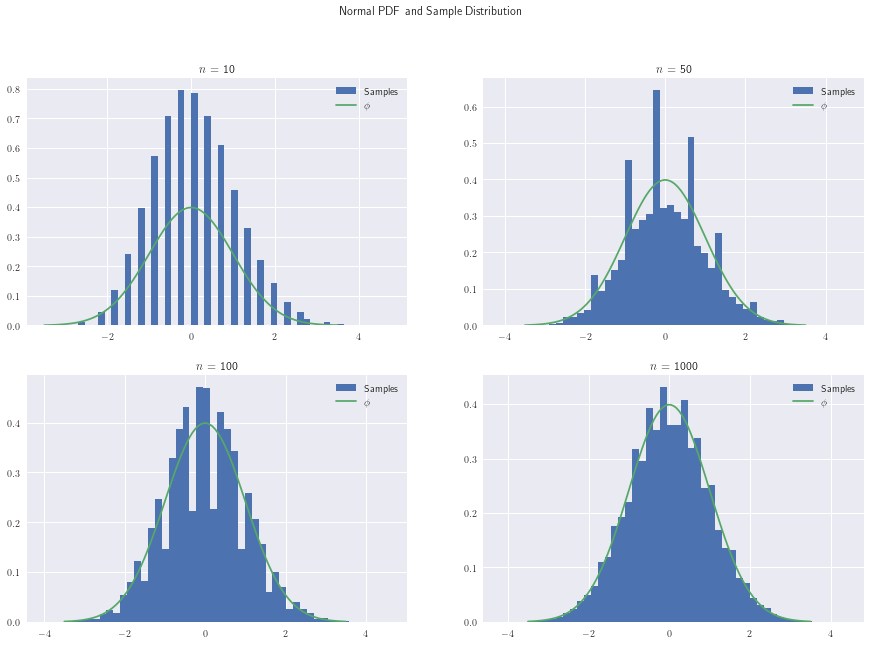

In [14]:
# Set up subplots
fig, ax = plt.subplots(2, 2, figsize = (15, 10))

# Generate x-values
x_vals = np.linspace(-3.5, 3.5, 100)

# Generate phi-values
phi_vals = stats.norm.pdf(x_vals)

for i, n in enumerate(n_vals):
    
    # Get row and column
    row, col = i//2, i % 2
    
    # Create histogram
    ax[row, col].hist(sample_dict[n], density = True, bins = 50, label = 'Samples')

    # Overlay pdf values
    ax[row, col].plot(x_vals, phi_vals, label = r'$\phi$')
    
    # Give it a title
    ax[row, col].set_title(f'$n$ = {n}')
    
    # Add a legend
    ax[row, col].legend()
                
# Give entire figure a title
plt.suptitle(r'Normal PDF and Sample Distribution')

plt.show()

(d) Display your results in (a) using cumulative distribution functions. Create a new $2\times 2$ grid of subplots. Calculate the empirical cdf for each array of standardized sample means and graph it. Then overlay the graph of $\Phi$ the cumulative distribution function of $\mathcal{N}(0, 1^2)$. Add a title and legend to each subplot.

**Solution**

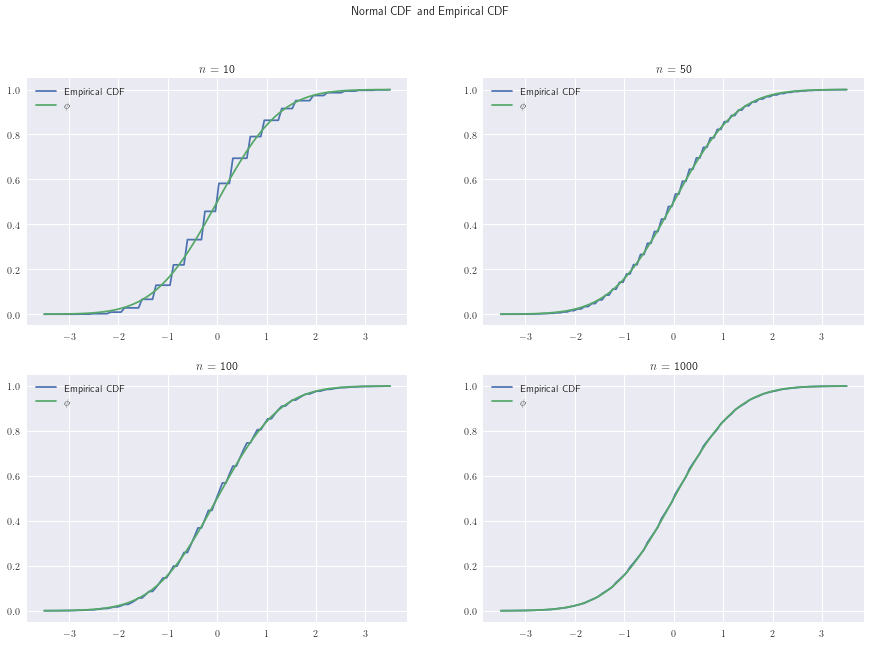

In [15]:
# Set up subplots
fig, ax = plt.subplots(2, 2, figsize = (15, 10))

# Generate x-values
x_vals = np.linspace(-3.5, 3.5, 100)

# Generate Phi-values
Phi_vals = stats.norm.cdf(x_vals)

for i, n in enumerate(n_vals):
    
    row, col = i//2, i % 2
    
    # Get empirical cdf
    ecdf = lambda x: np.mean(sample_dict[n] <= x)
    
    # Calculate the y-values
    y_vals = [ecdf(x) for x in x_vals]
    
    # Create histogram
    ax[row, col].plot(x_vals, y_vals, label = 'Empirical CDF')

    # Overlay cdf values
    ax[row, col].plot(x_vals, Phi_vals, label = r'$\phi$')
    
    # Give it a title
    ax[row, col].set_title(f'$n$ = {n}')
    
    # Add a legend
    ax[row, col].legend()
                
# Give entire figure a title
plt.suptitle(r'Normal CDF and Empirical CDF')

plt.show()